In [8]:
import numpy as np
import matplotlib.pyplot as plt 
def create_problem(m,n,scale,x0):
    #centered a
    A = scale*(np.random.rand(n,m)-.5)
    b = x0@A + 5*scale*np.random.rand(m)
    c = (np.random.rand(n)-.5)
    return A,b,c

# Etude du probleme à moyenne dimension     

## Etude preliminaire  

## Etude numerique

In [9]:
# 1. generation of A,b et c
m = 500
n = 2
scale = 2
x0 = np.ones(n)
A, b, c = create_problem(m, n, scale, x0)

### 

In [11]:
# useful functions

def golden_search(f, a, b, epsilon=10**-4):
    phi = (1 + np.sqrt(5)) / 2
    while b - a > epsilon:
        c = a + (b - a) / (phi + 1)
        d = b - (b - a) / (phi + 1)
        if f(c) < f(d):
            b = d
        else:
            a = c
    return (a + b) / 2

def backtracking(cost, gradient, x, sigma_init=2, c=0.2, roo=0.5):
    dk = -gradient(x)
    f_x = cost(x)
    while cost(x + sigma_init*dk) > f_x  - c*sigma_init*dk@dk:
        sigma_init = roo*sigma_init
    return sigma_init

def get_step_function(cost, gradient, x, name='golden_search'):
    if name == 'golden_search':
        return golden_search(lambda sigma : cost(x - sigma*gradient(x)), 0, .1)
    elif name == 'backtracking':
        return backtracking(cost, gradient, x)
    else:
        return 1e-3
    
def steepest_descent(x0,cost,gradient, step_f_name="golden_search", epsilon=1e-2, maxiter=100000):
    xlist = [x0] # list of points
    flist = [cost(x0)] # list of cost function  values
    nlist = [np.linalg.norm(gradient(x0))] # list of gradient norm values
    it = 0

    x = xlist[-1]
    grad = gradient(x)
    step = get_step_function(cost, gradient, x, name=step_f_name)
    xk = x - step*grad 
    xlist.append(xk)
    flist.append(cost(xk))
    nlist.append(np.linalg.norm(gradient(xk)))
    while np.abs(flist[-2] - flist[-1]) > epsilon:
        x = xlist[-1]
        grad = gradient(x)
        step = get_step_function(cost, gradient, x, name=step_f_name)
        xk = x - step*grad 
        xlist.append(xk)
        flist.append(cost(xk))
        nlist.append(np.linalg.norm(gradient(xk)))
        it += 1
        if it > maxiter:
            break
    return xlist,flist,nlist


def visualize_gradient_descent(cost, gradient, xstar, step_f_name="golden_search", epsilon=1e-4, maxiter=100000):
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        #
        fig = plt.figure(1, figsize=(19,5))
        xlist,flist,nlist =  steepest_descent(x0,cost,gradient,step_f_name=step_f_name)
        xlist = np.asarray(xlist)
        #
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
        #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$\nabla f(x^k)$')
        
        
    # 
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()





In [12]:


def get_cost(A, b, c):
    def cost(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        cout = np.dot(c, x) - np.sum(np.log(b - np.dot(A.T, x)))
        return cout
    return cost



def get_gradient(A, b, c):
    def gradient(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        grad = c + np.dot(A, 1/(b - np.dot(A.T, x)))
        return grad
    return gradient

cost = get_cost(A, b, c)
gradient = get_gradient(A, b, c)


Step function:  backtracking


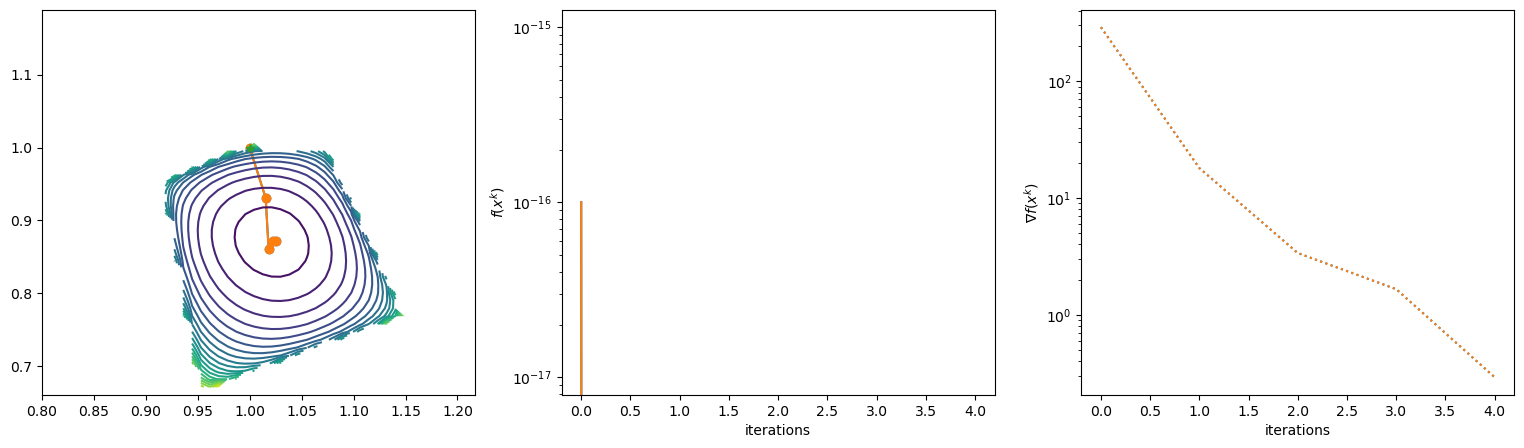

In [13]:
# step_funtion =  ["golden_search", "backtracking", "constant_step"]
step_funtion =  ["backtracking",]
for step_f in step_funtion:
    print("Step function: ", step_f)
    visualize_gradient_descent(cost, gradient, xstar=x0, step_f_name=step_f)

Step function:  constant_step


C:\Users\Souniz\AppData\Local\Temp\ipykernel_10632\3501520077.py:91: RuntimeWarning: invalid value encountered in scalar divide
  xgrid = np.arange(ax,bx,(bx-ax)/50)


ValueError: arange: cannot compute length

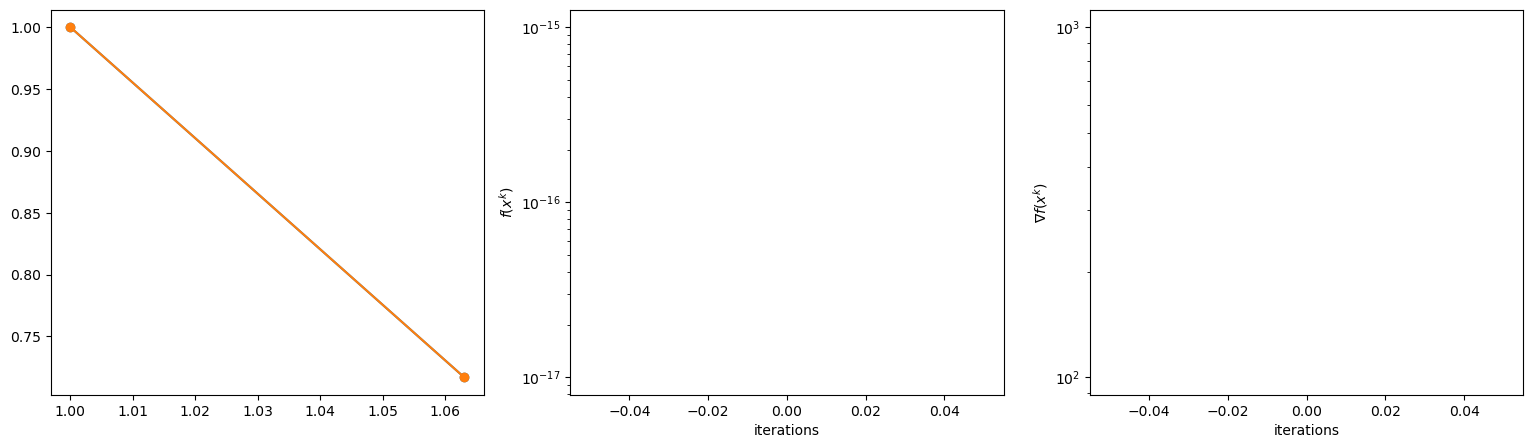

In [15]:
# step_funtion =  ["golden_search", "backtracking", "constant_step"]
step_funtion =  ["constant_step",]
for step_f in step_funtion:
    print("Step function: ", step_f)
    visualize_gradient_descent(cost, gradient, xstar=x0, step_f_name=step_f)

##